In [1]:
import torch
import pro_gan_pytorch.PRO_GAN as pg
import matplotlib.pyplot as plt
from collections import OrderedDict

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = pg.Generator(depth=6, latent_size=512, use_eql=True).to(device)

depth = 3
state_dict = torch.load("./results/models/GAN_GEN_%d.pth"%depth)

new_state_dict = OrderedDict()
## 만약, 다중 GPU를 사용한 학습을 진행했다면 아래 for문을 주석 처리합니다.
for k, v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v
gen.load_state_dict(new_state_dict)

<All keys matched successfully>

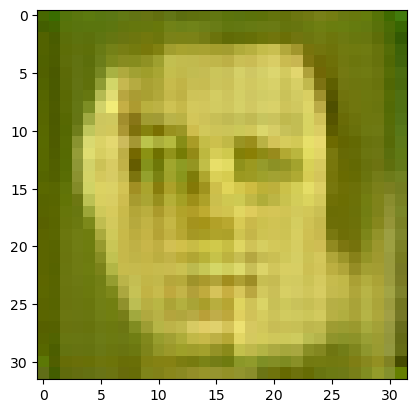

In [2]:
noise = torch.randn(1, 512).to(device)
sample_image = gen(noise, depth=depth, alpha=1).detach().cpu()
img = torch.clamp(((sample_image[0].permute(1, 2, 0)+1)/2),0,1)
plt.imshow(img)
plt.show()

In [1]:
import torch
use_gpu = True if torch.cuda.is_available() else False

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

Using cache found in C:\Users\chlwo/.cache\torch\hub\facebookresearch_pytorch_GAN_zoo_hub


Average network found !


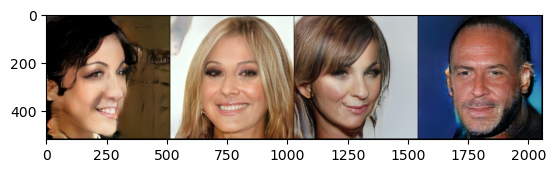

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())